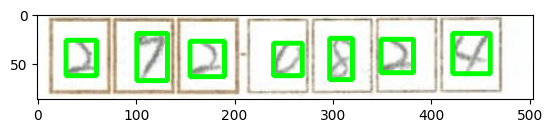

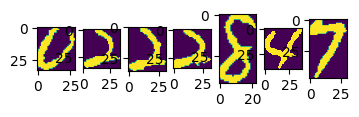

In [40]:
import cv2
import matplotlib.pyplot as plt
def extract_ROI(img):

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # remove background lines
    
    
    cv2.imwrite('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/dev/gray.jpg', gray)


    # extract digits regions from the image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # save thresh image to file
    cv2.imwrite('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/dev/thresh.jpg', thresh)



    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=10)

    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=10)

    remove_gridlines = cv2.bitwise_or(remove_horizontal, remove_vertical)
    # extand the gridlines
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    remove_gridlines = cv2.dilate(remove_gridlines, kernel, iterations=2)

    cv2.imwrite('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/dev/remove_horizontal.jpg', remove_horizontal)
    cv2.imwrite('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/dev/remove_vertical.jpg', remove_vertical)
    cv2.imwrite('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/dev/remove_gridlines.jpg', remove_gridlines)

    # remove gridlines from the image
    thresh = cv2.subtract(thresh, remove_gridlines)
    cv2.imwrite('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/dev/thresh_remove_gridlines.jpg', thresh)
    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get rectangles contains each contour
    rects = [cv2.boundingRect(ctr) for ctr in contours]

    # remove small rectangles
    rects = [rect for rect in rects if rect[2] > 10 and rect[3] > 10]


    return thresh, rects


def show_ROI(img, rects):
    for rect in rects:
        # Draw the rectangles
        cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2],
                                                rect[1] + rect[3]), (0, 255, 0), 3)

        # show each digit
        # plt.imshow(img[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]])
        # plt.show()
    
    # show the image
    plt.imshow(img)
    plt.show()
    


    
if __name__ == '__main__':
    img = cv2.imread('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/test/20211029194904.jpg')
    # img = cv2.imread('/Users/khanhhuyen/Documents/Digit_recognition/data/digit/test/20211029194922.jpg')
    preprocessed, ROI = extract_ROI(img)
    show_ROI(img, ROI)
    # show each digit
    plt.figure(figsize=(4, 4))
    for i in range(len(ROI)):
        digit = preprocessed[ROI[i][1]:ROI[i][1] + ROI[i][3], ROI[i][0]:ROI[i][0] + ROI[i][2]]
        plt.subplot(1, len(ROI), i + 1)
        plt.imshow(digit)
    plt.show()
    